## ファイルから画像データセットを読み込む

In [1]:
import os

os.chdir("..")

In [2]:
import numpy as np
from pathlib import Path

imgdir_path = Path("cat_dog_images")
file_list = [str(path) for path in imgdir_path.glob("*.jpg")]

Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


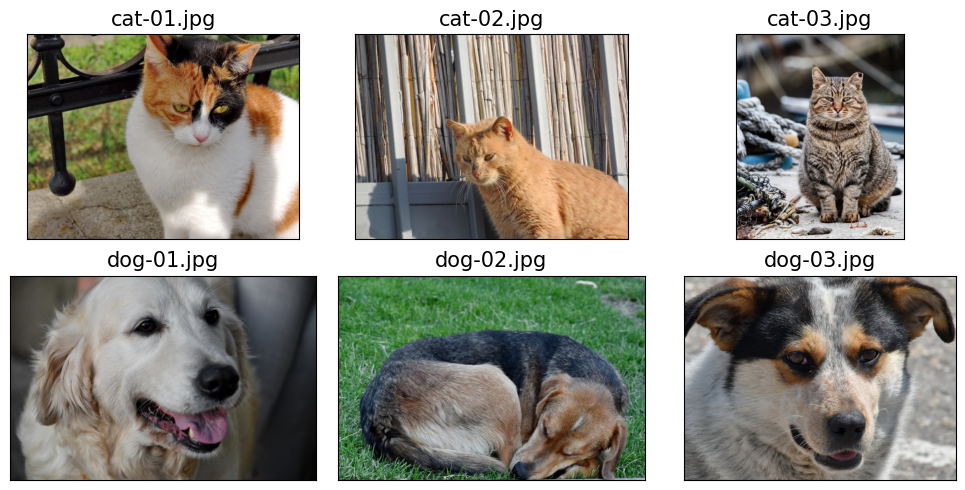

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

fig = plt.figure(figsize=(10, 5))

for i, file in enumerate(file_list):
    img = Image.open(file)
    print(f"Image shape: {np.array(img).shape}")
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

In [4]:
labels = [1 if "dog" in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [5]:
from torch.utils.data import Dataset


class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)


image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


In [6]:
from torchvision import transforms

img_height, img_width = 80, 120
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((img_height, img_width)),
    ]
)

In [7]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transforms=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label

    def __len__(self):
        return len(self.labels)


image_dataset = ImageDataset(file_list, labels, transform)

/home/yukimura/study_pytorch/.venv/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


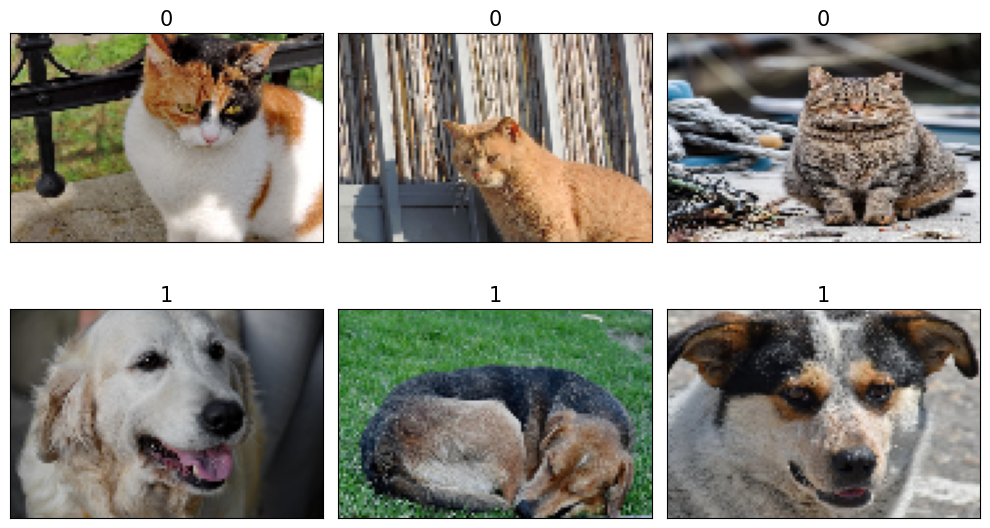

In [8]:
fig = plt.figure(figsize=(10, 6))

for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(example[1], size=15)

plt.tight_layout()
plt.show()

## torchvision.datasets ライブラリからデータセットを取り込む

In [9]:
import torchvision

image_path = "./"
celeba_dataset = torchvision.datasets.CelebA(image_path, split="train", target_type="attr", download=True)
# RuntimeError: The MD5 checksum of the download file ./celeba/img_align_celeba.zip does not match the
# one on record.Please delete the file and try again. If the issue persists, please report this to torchvision
# at https://github.com/pytorch/vision/issues.

2422.0 bytes
/home/yukimura/study_pytorch/.venv/lib/python3.11/site-packages/torchvision/datasets/utils.py:260: UserWarning: We detected some HTML elements in the downloaded file. This most likely means that the download triggered an unhandled API response by GDrive. Please report this to torchvision at https://github.com/pytorch/vision/issues including the response:

<!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv="content-type" content="text/html; charset=utf-8"/><style nonce="WOsAZgRxcN07AB5TgBqEXQ">.goog-link-button{position:relative;color:#15c;text-decoration:underline;cursor:pointer}.goog-link-button-disabled{color:#ccc;text-decoration:none;cursor:default}body{color:#222;font:normal 13px/1.4 arial,sans-serif;margin:0}.grecaptcha-badge{visibility:hidden}.uc-main{padding-top:50px;text-align:center}#uc-dl-icon{display:inline-block;margin-top:16px;padding-right:1em;vertical-align:top}#uc-text{display:inline-block;max-width:68ex;text-align:l

RuntimeError: The MD5 checksum of the download file ./celeba/img_align_celeba.zip does not match the one on record.Please delete the file and try again. If the issue persists, please report this to torchvision at https://github.com/pytorch/vision/issues.